

# Project: Investigating this Dataset - [TMDB Movie Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## INTRODUCTION



## Dataset Description 

> The fear of every movie production company is to deliver and produce movies that would provide a higher return on investment(ROI). Hence information and knowledge of factors and resources that influence the success of a movie is neccessary. Questions like; Are there specific companies or type of genres among other factors that induce higher revenues.


This dataset consists of 10,866 observations and 21 columns collected from `The Movie Database`.

### The columns include; 
'id',
'imdb_id',
'popularity',
'budget',
'revenue',
'original_title',
'cast',
'homepage',
'director',
'tagline',
'keywords',
'overview',
'runtime',
'genres',
'production_companies',
'release_date',
'vote_count',
'vote_average',
'release_year',
'budget_adj',
'revenue_adj'.
 
 
> From the above information provided we can thus determine and predict films that would return high revenue, we can get answers to bugging questions that would arise during the initial phases of movie production e.g does the budget of a production affect ratings or returns, do release dates affect movies or do cast members contribute to revenue.
 
From this data, we can explore and examine our observations and thus make data driven decisions.


### Question(s) for Analysis
The overall aim of this analysis is to investigate the kinds of properties are associated with movies with higher revenues.

1. What runtime are recommended for movies and does the length of a movie determine the revenue obtained.
2. Do genres containg romance recieve higher popularity

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0 

## Data Wrangling

In [36]:

df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv')

In [37]:
df.head(5) 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [38]:
# Checking the data types
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [39]:
# General overview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [40]:
# Checking for duplicated values across all columns in our dataset
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [41]:
# checking for duplicate values for id, since this is an independent variable
df[df.id.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [42]:
# it is practically impossible for a movie to have thesame name, director and companies and release date, Since this returns 1, we have only one duplicated value across our dataset 

sum(df[['original_title', 'director','production_companies', 'release_date']].duplicated())

1

In [43]:
# Checking for null values
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> Looking at our data info, 
>1. I would be dropping the homepage column, since over 50% of the data is not provided(that is NaN)

>2. I do not require the 'tagline' column for the purpose of my analysis, hence I would be dropping this as it has the next highest number of Nan values

>3. I would be dropping null values across our entire dataset. In our dataset, the columns with missing values are object types, because of the distinct nature of our dataset, we cannot fill up these nan values with the mode(highest occuring value) in each column. 
Each observation is unique; that is a particular movie will have its own director and production company. By filling the nan values with the mode, we would be altering the integrity of our dataset.


## Data  Cleaning

In [44]:
# dropping duplicates

df.drop_duplicates(inplace= True)

In [45]:
# confirming duplicates
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [46]:
# dropping columns with more NaN values
df.drop(columns = ['homepage', 'tagline'], inplace = True)

In [47]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [48]:
# Dropping null values
df.dropna(inplace= True)

In [49]:
# Confirming
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [50]:
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Research Question 1 (What runtime are recommended for movies and does the length of a movie affect vote average)

> To determine the runtime recommended for movies, we first need to classify/group the length of movies into; 
Long and
Short
Then we evaluate the relationship between the classifications of movie length and the revenue obtained.

In [51]:
# We obtain the mean values for runtime
df['runtime'].describe().round(2)

count    8664.00
mean      103.83
std        26.19
min         0.00
25%        91.00
50%       100.00
75%       113.00
max       705.00
Name: runtime, dtype: float64

### We then group these movies by the above quantiles into 'Short_time: between min and 50%, 'Long_time: between 50% and max.




In [52]:
# Creating our column; 'movie_length'
df['movie_length']= pd.cut(df['runtime'], [0.00, 100.00, 705.00], labels=['ShortTime', 'LongTime'])

In [53]:
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,movie_length
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,LongTime
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,LongTime
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,LongTime
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,LongTime
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,LongTime


In [54]:
# 
df['movie_length'].value_counts()

ShortTime    4399
LongTime     4258
Name: movie_length, dtype: int64

In [55]:
# we then group by the movie_length
movies_d= df.groupby('movie_length')['revenue'].mean()

In [56]:
movies_d

movie_length
ShortTime    2.663194e+07
LongTime     7.271835e+07
Name: revenue, dtype: float64

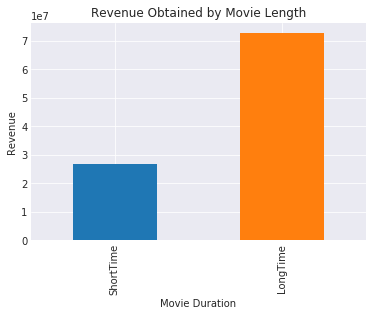

In [57]:
sns.set_style('darkgrid')
movies_d.plot(kind ='bar', title= 'Revenue Obtained by Movie Length')

plt.xlabel('Movie Duration')

plt.ylabel('Revenue');

> **The above plot shows the graphical representation of the relationship between the revenue obtained from the movies (on the y-axis) and the duration of the movie (x-axis), we can see that lengthy movies has more returns.** 

> **This plot is neccesary as we are recommending to stakeholder(producers) that the duration of a movie has an impact on the revenue generated, thus providing visuals of the inferences obtained from data analysis is necessary.**

### Creating  a function to plot a scatter plot

In [58]:
def scatter_plot(x, y, title, xlabel, ylabel):
    plt.scatter(x,y)
    plt.title(title)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

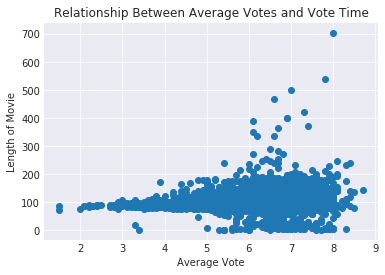

In [59]:
scatter_plot(df.vote_average, df.runtime, 'Relationship Between Average Votes and Vote Time', 'Average Vote', 'Length of Movie')

> **Scatter plots are used to show corrrelation, from the above plot we can see from the relationship between movie duration and average votes that long-time movies(above 100) has a positive correlation that is increase in movie length though minute, results in increase in vote average.**

### Research Question 2  (Do genres containing romance recieve higher popularity)

> To do this, we first have to use the describe method to find the average popularity value.

> Then we get the dataset for genres with romance. To get this table, we use the 'str.contains' function to select movies containing romance. We then evaluate the distribution.

In [60]:
# Finding the average popularity values

df['popularity'].describe().round(2)

count    8664.00
mean        0.74
std         1.09
min         0.00
25%         0.25
50%         0.45
75%         0.84
max        32.99
Name: popularity, dtype: float64

In [61]:
new_df= df[df['genres'].str.contains('Romance')]

### 'new_df' is the table having movies with romance genre

In [62]:
new_df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,movie_length
18,150689,tt1661199,5.556818,95000000,542351353,Cinderella,Lily James|Cate Blanchett|Richard Madden|Helen...,Kenneth Branagh,cinderella|magic|fairy tale|princess|shoe,"When her father unexpectedly passes away, youn...",112,Romance|Fantasy|Family|Drama,Walt Disney Pictures|Genre Films|Beagle Pug Fi...,3/12/15,1495,6.8,2015,8.739996e+07,4.989630e+08,LongTime


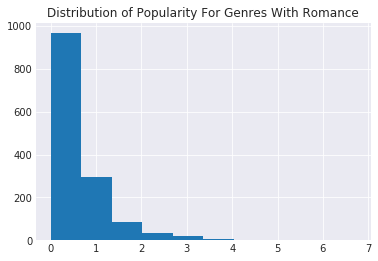

In [63]:
new_df['popularity'].hist()
plt.title('Distribution of Popularity For Genres With Romance');

> **The plot above evaluates our question for analysis; *Do genres containing romance recieve higher popularity.*** **Our histogram is right skewed towards the origin, we can thus see that a large amount of movies with romance genre have low popularity values less than 1.** 

In [64]:
new_df['popularity'].mean()

0.6595711809187278

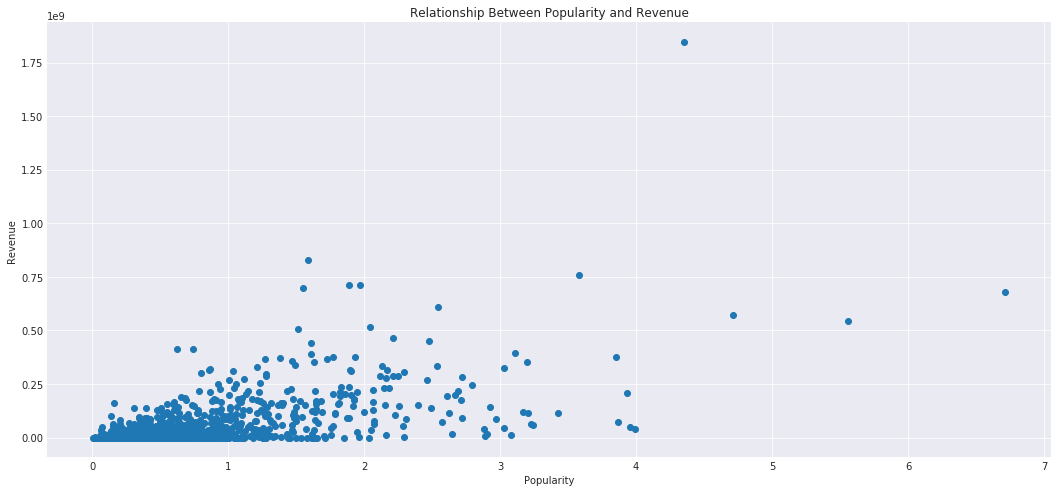

In [65]:
plt.figure(figsize= (18,8))
scatter_plot(new_df.popularity, new_df.revenue, 'Relationship Between Popularity and Revenue', 'Popularity', 'Revenue' )

> **The plot above shows the relationship between the popularity of a movie and the revenue generated from the movie. This returns a positive correlation as an increase in the popularity of a movie results in an increase in revenue. This is an important finding for stakeholders, to enable them deploy resources to enhance popularity.**

### CONCLUSION

### Question 2:  What runtime are recommended for movies and does the length 


> From our plot of movie duration to revenue, we can see that movies above the average in length provide more Return on Investment, compared to thos below(short duration movies). 
I thus recommend that producers factor time in the preplanning phase of movie production. 


> From our graph of movie length against vote average, there is no vivid correlation and we cannot decipher if movie length affects vote average.


### Question 2: Do Genres contianing Romance recieve higher popularity


> From the graph of popularity above, The histogram is right skewed; that is the peak of the graph lies to the left side. We can see that bulk of the values in our romance dataset have low popularity, this can be due to other external factors. 



> In the graph of popularity against revenue, we can see that romance movies tend to increase revenue positively(though the changes are small).



>Limitations:
Regarding the question I chose for analysis, more data/information on the mode of determining and finding popularity would be neccessary, to further analyze why popularity values are low for Romance included genres.

In [66]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0